In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn import decomposition
from sklearn.model_selection import cross_val_score

In [3]:
caracteristica,rotulo = load_breast_cancer(return_X_y=True)
#x,y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(caracteristica,rotulo, test_size=0.30, random_state=13)
#X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=13)

In [5]:
X_test.shape

(171, 30)

#Classificador

In [12]:
C = 1.0  # SVM regularization parameter
classifier = svm.SVC(kernel='linear', C=C)
 
# Fit
classifier.fit(X_train, y_train) #Essa etapa se refere ao treinamento do algoritimo
#svm_score = cross_val_score(classifier, X, y, cv=10, scoring='accuracy')
y_pred = classifier.predict(X_test) #Essa etapa o algoritimo tenta fazer a predição
y_score = classifier.fit(X_train, y_train).decision_function(X_test) #Essa etapa obtemos o score(desempenho) do algoritimo


In [8]:
classifier

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#Matriz de Confusão


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

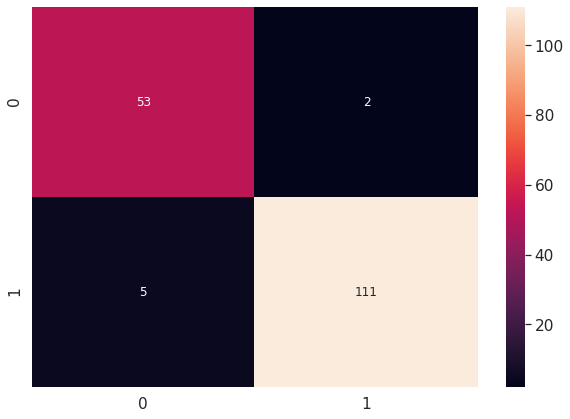

In [13]:
cf_matrix=confusion_matrix(y_test, y_pred)
cf_matrix

#plot_confusion_matrix(cf_matrix, X_test, y_test)  # doctest: +SKIP
#plt.show()  # doctest: +SKIP


df_cm = pd.DataFrame(cf_matrix, range(2),range(2))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)#for label size
cm_plot = sns.heatmap(df_cm, annot=True, fmt='n', annot_kws={"size": 12})

#Métricas 

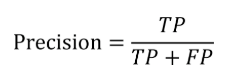

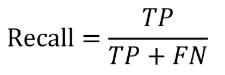

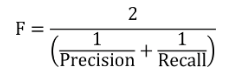

In [16]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

#importando e imprimindo o accuracy_score

print("Acuraccy score {}%".format(round(accuracy_score(y_test, y_pred),3)))
print("Precision score {}%".format(round(precision_score(y_test, y_pred),3)))
print("Recall score {}%".format(round(recall_score(y_test, y_pred),3)))
print("F1 Score {}%".format(round(f1_score(y_test, y_pred, average='weighted'),3)))

Acuraccy score 0.959%
Precision score 0.982%
Recall score 0.957%
F1 Score 0.959%


#Curva ROC

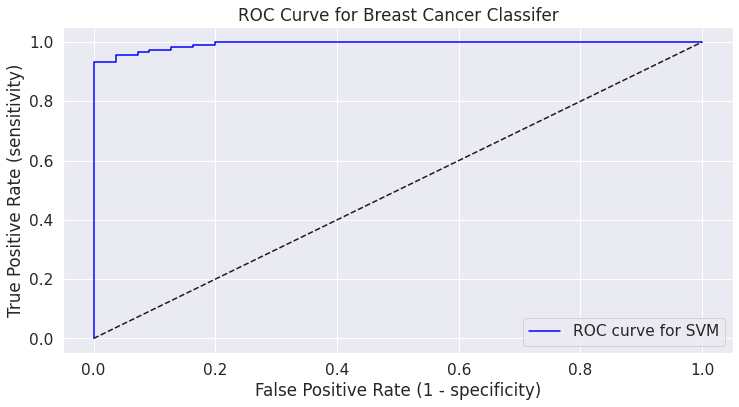

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)
 
 
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve for SVM')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.title('ROC Curve for Breast Cancer Classifer')
plt.legend(loc="lower right")